# DDMI Agentic Trading

## Cell 1 
### Making sure data is correctly loaded

In [1]:
import sys 
sys.path.append('../')
from src.data_loader import download_prices

# Download fresh data
prices = download_prices()

# Display tail
prices.tail()

Saved raw prices to /Users/sanduandrei/Desktop/DDMI-AgenticTrading/data/raw/prices_yahoo.csv


Price            Close                                           High  \
Ticker             QQQ        SPXL        TLT        TQQQ         QQQ   
Date                                                                    
2025-11-07  609.739990  212.960007  89.570000  105.779999  609.950012   
2025-11-10  623.229980  222.660004  89.550003  112.709999  624.309998   
2025-11-11  621.570007  224.160004  89.959999  111.779999  622.719971   
2025-11-12  621.080017  224.520004  90.120003  111.550003  624.859985   
2025-11-13  608.400024  213.389999  89.379997  104.660004  618.119995   

Price                                                 Low              \
Ticker            SPXL        TLT        TQQQ         QQQ        SPXL   
Date                                                                    
2025-11-07  213.039993  89.870003  105.839996  598.669983  203.630005   
2025-11-10  223.509995  89.669998  113.250000  616.890015  216.759995   
2025-11-11  224.830002  90.070000  112.419998  617.520020  220.130005   
2025-11-12  226.149994  90.320000  113.540001  617.809998  222.220001   
2025-11-13  222.039993  89.940002  109.870003  606.085510  211.890106   

Price                                    Open                         \
Ticker            TLT        TQQQ         QQQ        SPXL        TLT   
Date                                                                   
2025-11-07  89.360001   99.959999  608.309998  209.990005  89.360001   
2025-11-10  89.389999  109.410004  618.919983  218.830002  89.489998   
2025-11-11  89.779999  109.599998  620.570007  221.300003  89.949997   
2025-11-12  89.879997  109.730003  624.840027  226.029999  89.949997   
2025-11-13  89.379997  103.400002  617.565002  221.770004  89.820000   

Price                     Volume                                 
Ticker            TQQQ       QQQ     SPXL       TLT        TQQQ  
Date                                                             
2025-11-07  105.019997  81835400  6900300  28530100  91794700.0  
2025-11-10  110.430000  55919900  3136600  24093500  59939400.0  
2025-11-11  111.269997  44868800  4998900  18942300  51332800.0  
2025-11-12  113.529999  47444400  2485100  23594900  62854200.0  
2025-11-13  109.580002  69823180  5176011  33721619  99295592.0

## Cell 2
### Visualising loaded data for context

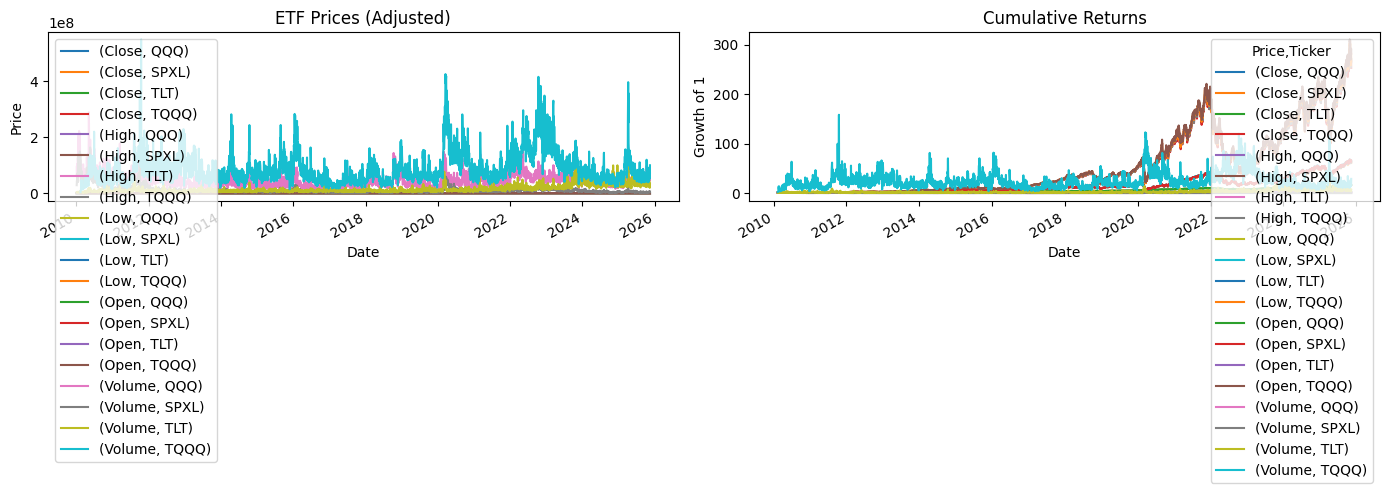

In [2]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 2, figsize=(14, 4), sharex=False)

prices.plot(ax=ax[0])
ax[0].set_title("ETF Prices (Adjusted)")
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Price")
ax[0].legend(loc="upper left")

ret = prices.pct_change().dropna()
cumret = (1 + ret).cumprod()

cumret.plot(ax=ax[1])
ax[1].set_title("Cumulative Returns")
ax[1].set_xlabel("Date")
ax[1].set_ylabel("Growth of 1")

plt.tight_layout()
plt.show()


## Cell 3
### Loading processed prices and visualising them

In [11]:
from src.data_loader import build_processed_prices, load_processed_prices

# Build once (or force when you change logic)
prices = build_processed_prices(force_rebuild=False)

# or, for a lighter call in the future:
prices = load_processed_prices()
prices.head()



Loading existing processed prices from /Users/sanduandrei/Desktop/DDMI-AgenticTrading/data/processed/prices_daily.parquet


,date,ticker,open,high,low,close,adj_close,volume,ret_1d,log_ret_1d,ret_fwd_1d,ret_fwd_5d,vol_20d
0,2010-01-04,QQQ,40.315242,40.454470,40.263030,40.393555,40.393555,62822800.0,NaN,NaN,0.000000,-0.001292,NaN
3,2010-01-05,QQQ,40.367450,40.463170,40.167310,40.393555,40.393555,62935600.0,0.000000,0.000000,-0.006031,-0.013787,NaN
6,2010-01-06,QQQ,40.376173,40.506697,40.089013,40.149925,40.149925,96033000.0,-0.006031,-0.006050,0.000650,0.004551,NaN
9,2010-01-07,QQQ,40.210826,40.263037,39.958474,40.176018,40.176018,77094100.0,0.000650,0.000650,0.008231,0.004765,NaN
12,2010-01-08,QQQ,40.089003,40.506687,39.967179,40.506687,40.506687,88886600.0,0.008231,0.008197,-0.004082,-0.015038,NaN


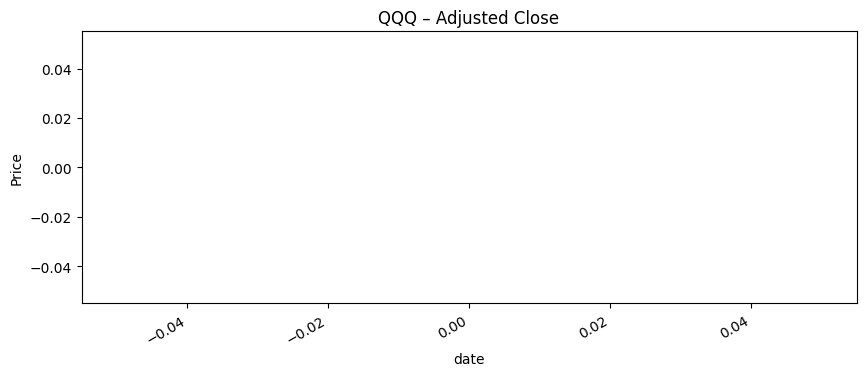

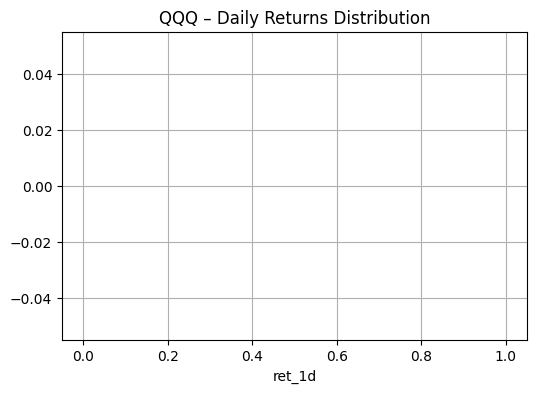

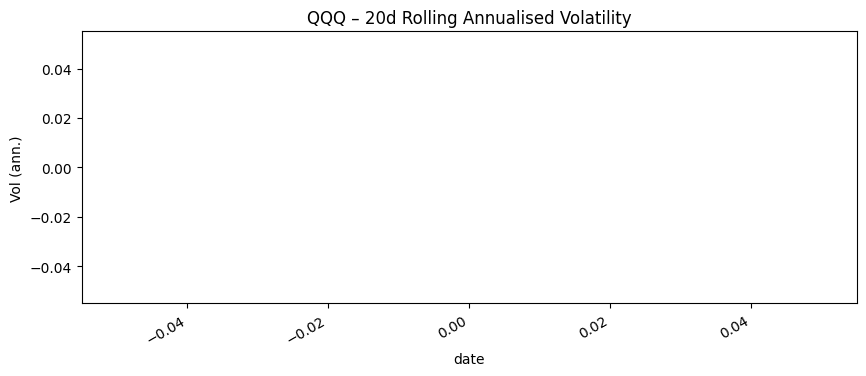

In [13]:
import matplotlib.pyplot as plt
from src.data_loader import build_processed_prices, load_processed_prices

qqq = prices[prices["ticker"] == "TQQQ"].set_index("date")

plt.figure(figsize=(10, 4))
qqq["adj_close"].plot()
plt.title("QQQ – Adjusted Close")
plt.ylabel("Price")
plt.show()

plt.figure(figsize=(6, 4))
qqq["ret_1d"].hist(bins=50)
plt.title("QQQ – Daily Returns Distribution")
plt.xlabel("ret_1d")
plt.show()

plt.figure(figsize=(10, 4))
qqq["vol_20d"].plot()
plt.title("QQQ – 20d Rolling Annualised Volatility")
plt.ylabel("Vol (ann.)")
plt.show()
